# Monte Carlo Simulation

### Introduction

In trading, Monte Carlo simulation is a form of backtest used to model possible movements of an asset’s price and to predict future prices. It helps traders understand the probability of different outcomes so that they can make an informed decision.  The method uses a random number from 0 to 1 which represents a probability on how your portfolio might do in the first year, second year so on. Then it re-randomises again and goes through the same process over and over. Of all of the thousands or hundreds of models that are run, a trader will look at the percentage of outcomes that were successful. Overall, it simulates many potential outcomes, provides the trader with the probability of success and helps measure the robustness of a trading system.

### Importing necessary libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
# import fxcmpy
import datetime as dt

In [4]:
file = 'EUR_USD_M5_history.csv'
df = pd.read_csv(file)
df

,Unnamed: 0,Unnamed: 0.1,dt,Open,High,Low,Close,Volume,fast_sma,slow_sma,Lstoch,Hstoch,%K,%D
0,0,0,2018-11-01T00:00:00.000000000Z,1.13144,1.13157,1.13127,1.13156,172,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2018-11-01T00:05:00.000000000Z,1.13155,1.13170,1.13126,1.13137,121,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2018-11-01T00:10:00.000000000Z,1.13138,1.13167,1.13132,1.13162,227,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2018-11-01T00:15:00.000000000Z,1.13161,1.13186,1.13161,1.13164,92,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2018-11-01T00:20:00.000000000Z,1.13162,1.13180,1.13146,1.13180,141,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,2018-11-01T00:25:00.000000000Z,1.13186,1.13219,1.13168,1.13185,616,1.131640,NaN,NaN,NaN,NaN,NaN
6,6,6,2018-11-01T00:30:00.000000000Z,1.13187,1.13254,1.13183,1.13232,487,1.131767,NaN,NaN,NaN,NaN,NaN
7,7,7,2018-11-01T00:35:00.000000000Z,1.13229,1.13246,1.13204,1.13223,285,1.131910,NaN,NaN,NaN,NaN,NaN
8,8,8,2018-11-01T00:40:00.000000000Z,1.13222,1.13296,1.13222,1.13282,503,1.132110,NaN,NaN,NaN,NaN,NaN
9,9,9,2018-11-01T00:45:00.000000000Z,1.13282,1.13283,1.13248,1.13265,282,1.132278,1.131986,NaN,NaN,NaN,NaN


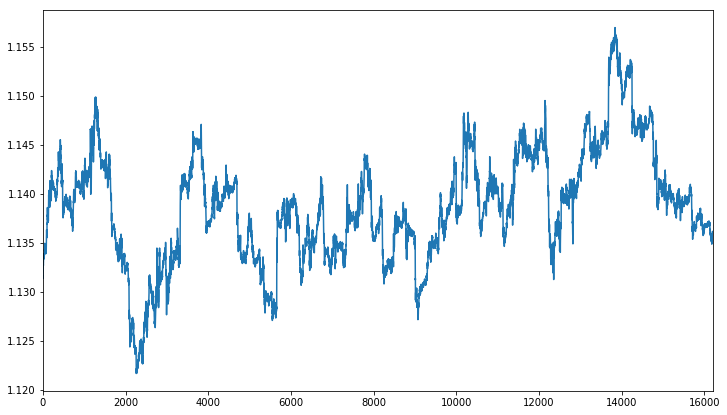

In [6]:
data = df['Close']
data.plot(figsize=(12, 7));

We just charted the daily rate of the EUR/USD over the test period. We will calculate the historical log returns as a daily percent change using the below code. Logarithmic returns are calculated by taking the log of the simple returns as a percent. We can then verify that it is calculated by printing out the last 5 or the tail of the log returns.

In [7]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

16199    0.000097
16200    0.000044
16201   -0.000070
16202    0.000335
16203   -0.000070
Name: Close, dtype: float64

The next step is to calculate the mean or the average daily return. The numpy function .mean can be used to calculate this.

In [8]:
u = log_returns.mean()
u

2.4603645705564547e-07

In the same way, the variance can be calculated using the .var function

In [9]:
var = log_returns.var()
var

7.634812821293143e-08

Now that variance and the mean have been calculated, we can finish calculating drift. Remember that drift is the mean minus half the variance or.

In [10]:
drift = u - (0.5 * var)
drift

2.0786239294917975e-07

The next piece of the puzzle that needs to be calculated is the standard deviation of the log returns. This can easily be calculated and saved as stdev like the code below.

In [11]:
stdev = log_returns.std()
stdev

0.0002763116505197192

So far we have calculated the drift and the standard deviation. Now we just need to calculate Z which is the distance from the mean in standard deviations. Essentially it is used to calculate the distance from the mean with each of these randomly generated probabilities. We will then run our random probabilities from 0 to 1 through the argument. We use norm from scipy using Norm.ppf which allows us to obtain Z. For example, if an event has 75% of occurring, then the distance from the event to the mean is 0.67 standard deviations.

In [12]:
norm.ppf(0.75)

0.67448975019608171

So these are all of our randomly generated probabilities. We will run 10 iterations of potential rates for 1000 days. Therefore the daily rates output will be a multi-dimensional array of 1000 rows by ten columns. Np.exp will let us take e to the power of r which will be the drift plus the stdev that we already calculated times the norm.ppf (which is our standard deviation). The rand function will be used to fill it will probabilities from 0 to 1.

In [13]:
days = 1000
iterations = 10
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(days, iterations)))
daily_returns

array([[ 1.0001391 ,  0.99972532,  0.99941668, ...,  0.99981977,
         1.00016906,  0.99990715],
       [ 1.00011862,  0.99920968,  1.00032512, ...,  1.00006672,
         0.99996591,  1.00040437],
       [ 0.99959894,  0.99989552,  1.0003757 , ...,  0.99955577,
         0.99996059,  0.99968063],
       ..., 
       [ 0.99958895,  0.99957818,  1.0000533 , ...,  0.99981935,
         0.99985583,  0.99951298],
       [ 1.00027395,  1.00040901,  0.99988787, ...,  0.9996372 ,
         1.00038477,  0.99984903],
       [ 0.99965118,  0.99984675,  0.99993635, ...,  1.00033181,
         1.00005506,  0.99957169]])

The output is our random daily EUR/USD prices which is . A few more steps and this calculation is complete.   Remember how today’s price = yesterday’s price * .?  Since that is calculated, “yesterday’s price” needs to be pinpointed and then we just need to repeat the process and plot the results in order to finish the simulation. We will use the .iloc method to define our starting point at S0.

In [14]:
S0 = data.iloc[-1]
S0

1.13608

With the first price pinpointed, it will be used as the starting point of each of the ten iterations. As mentioned before, the results of the Monte Carlo simulation will be calculated in an array so the starting point will be 1.13752 in the first row.  We need to set up the framework so we can run a loop through all of the iterations. The framework will be created using np.zeros_like and the arguments will be the daily returns or

In [15]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[ 1.13608,  1.13608,  1.13608, ...,  1.13608,  1.13608,  1.13608],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       ..., 
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ]])


The object is set up so now we run a loop to fill it with the expected EUR/USD rates. The price today is equal to the price yesterday times the daily return. The loop looks like this

In [16]:
for d in range(1, days):
    price_list[d] = price_list[d - 1] * daily_returns[d]
    
price_list

array([[ 1.13608   ,  1.13608   ,  1.13608   , ...,  1.13608   ,
         1.13608   ,  1.13608   ],
       [ 1.13621477,  1.13518214,  1.13644936, ...,  1.1361558 ,
         1.13604127,  1.1365394 ],
       [ 1.13575908,  1.13506354,  1.13687632, ...,  1.13565109,
         1.1359965 ,  1.13617642],
       ..., 
       [ 1.14621529,  1.13060706,  1.13710774, ...,  1.13430193,
         1.13633937,  1.15821322],
       [ 1.1465293 ,  1.13106949,  1.13698023, ...,  1.1338904 ,
         1.1367766 ,  1.15803837],
       [ 1.14612937,  1.13089615,  1.13690786, ...,  1.13426664,
         1.13683919,  1.15754237]])

simply plotted out using matplotlib to show the ten possible paths of the currency pair over 1000 days.

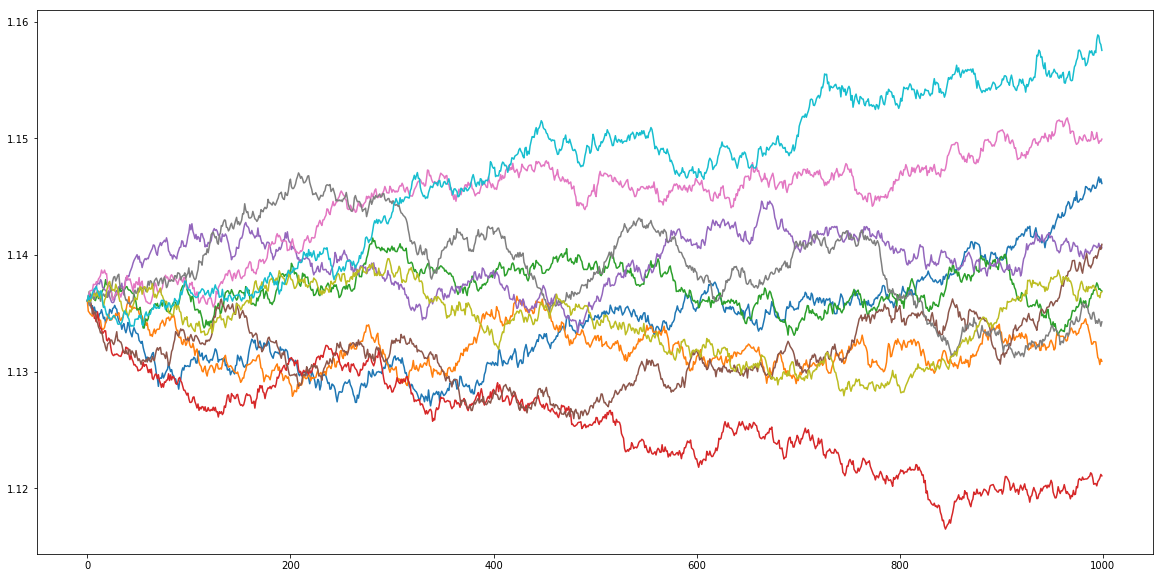

In [19]:
plt.figure(figsize=(20,10))
plt.plot(price_list);